# Analysis of Speech Sounds
Based on Chs. 6,7,8,9 of Johnson, Keith. (2012). _Acoustic and Auditory Phonetics_. 3rd Ed. [Wiley-Blackwell](https://www.wiley.com/en-us/Acoustic+and+Auditory+Phonetics%2C+3rd+Edition-p-9781444343083).

---

## Programming Environment

In [1]:
import numpy                    as np
np.set_printoptions(suppress=True) # suppress scientific notation
import numpy.random             as npr
import pandas                   as pd

import matplotlib               as mpl
import matplotlib.pyplot        as plt
plt.style.use('ggplot');

from   html.entities import codepoint2name
import string
import unicodedata

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'        :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''                :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'          :<{pad}}: {s.version}")
print(f"{''                :<{pad}}: {s.version_info}")
print(f"{''                :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib'      :<{pad}}: {mpl.__version__}")
print(f"{'NumPy'           :<{pad}}: { np.__version__}")
print(f"{'Pandas'          :<{pad}}: { pd.__version__}")

EXECUTED            : 2023-05-17 19:52:17.069454

Platform            : 13.3.1 | Darwin | 22.4.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
NumPy               : 1.24.1
Pandas              : 1.5.3


---

## Vowels
Based on Ch 6 of Keith Johnson's _Acoustic and Auditory Phonetics_.

### Tube Models of Vowel Production

Tube models of vowel production
* vocal tract as cylinder

Source-Filter Theory
* the prediction of resonant frequencies of the vocal tract (formants), assuming that the cross-sectional area of the tube is uniform
* the resonant frequencies as a function of tube length

lengthening of the tube
* lip protrusion
* larynx lowering

vocal tract as a set of tubes of varying width

#### Two-Tube Model
[Stevens 1989]

    The vocal tract is modeled as the set of two uniform tubes.

    back tube b, open at one end and closed at one end
        lb length
        Ab cross-sectional area
        closed at the glottis
        open at the junction with the front tube

    front tube f, open at one end and closed at one end
        lf length
        Af cross-sectional area
        closed at the junction with the back tube
        open at the lips

$A_b\lt\lt A_f$

$
\begin{aligned}
\text{resonances of the back cavity}\,\,\,
F_{bn}
&=\frac{(2n-1)c}{4l_b}
\\
\text{resonances of the front cavity}\,\,\,
F_{fn}
&=\frac{(2n-1)c}{4l_f}
\end{aligned}
$

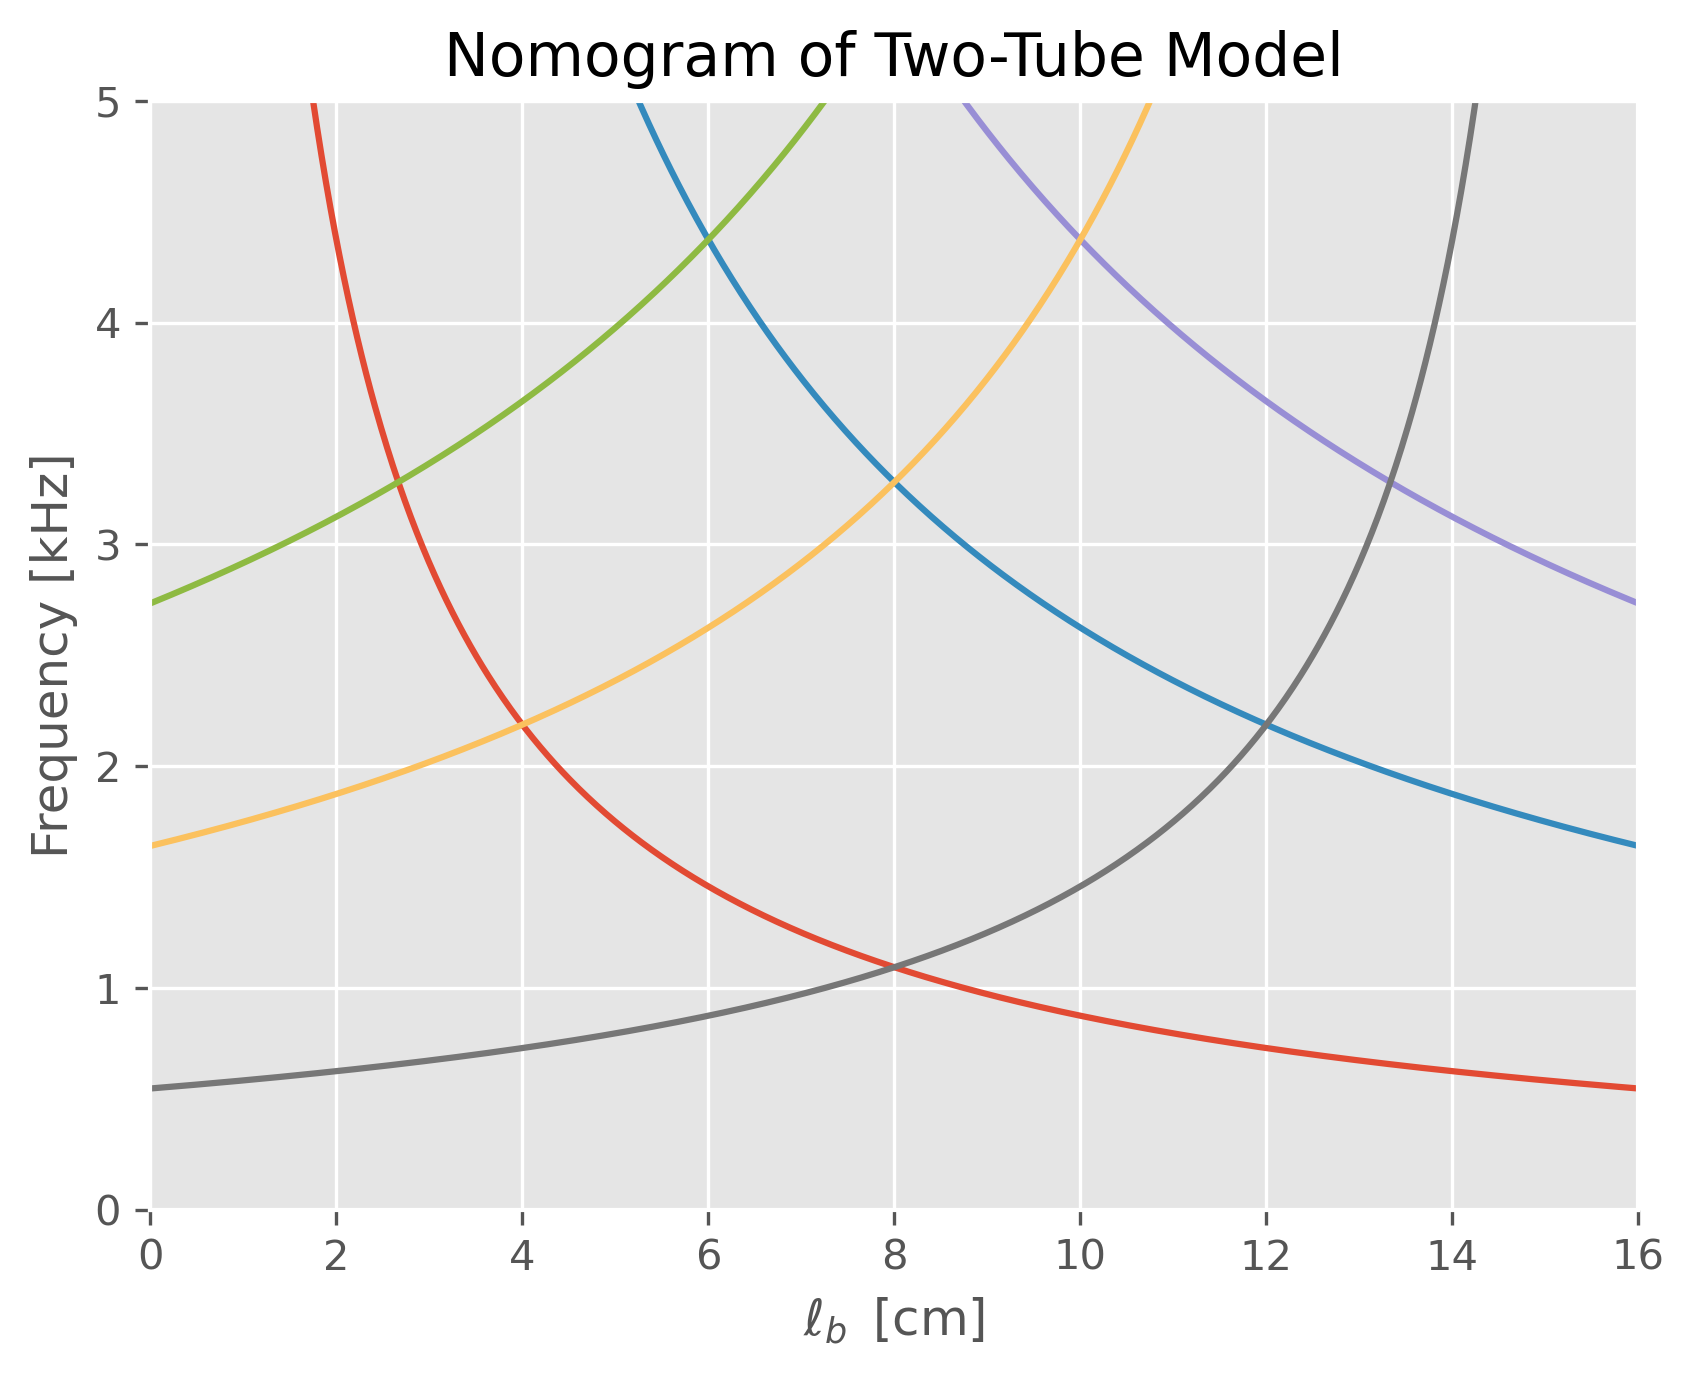

In [2]:
fig = plt.figure(dpi=300);
ax  = plt.subplot();
#ax.set_aspect(1);

def Fb (n,lb,L=16,c=35e3):
  return (2*n-1)*c/(4*lb)
def Ff (n,lf,L=16,c=35e3):
  return (2*n-1)*c/(4*(L-lf))

x=np.linspace(1e-3,16-1e-3,1001)
fb1=Fb(1,x)
fb2=Fb(2,x)
fb3=Fb(3,x)
ff1=Ff(1,x)
ff2=Ff(2,x)
ff3=Ff(3,x)

ax.plot(x,fb1);
ax.plot(x,fb2);
ax.plot(x,fb3);
ax.plot(x,ff1);
ax.plot(x,ff2);
ax.plot(x,ff3);

ax.set_yticks(ticks =[0,1e3,2e3,3e3,4e3,5e3],
              labels=[0,1,2,3,4,5]);
ax.set_xlim(0,16);
ax.set_ylim(0,5e3);
ax.set_xlabel('$\ell_b\,\,\,\mathrm{[cm]}$');
ax.set_ylabel('Frequency [kHz]');
ax.set_title('Nomogram of Two-Tube Model');

In [3]:
L=8
print(Ff(1,L))
print(Ff(2,L))
print(Ff(3,L))

1093.75
3281.25
5468.75


#### Two-Tube Model with short constriction

    The vocal tract is modeled as the set of three uniform tubes, where the third represents a short constriction.

    back tube b, closed at both ends
        lb length
        Ab cross-sectional area
        closed at the glottis
        closed at the constriction

    front tube f, open at one end and closed at one end
        lf length
        Af cross-sectional area
        closed at the constriction
        open at the lips

    short constriction
        lc length
        Ac cross-sectional area

$
\begin{aligned}
F_{n}
&=\frac{(2n-1)c}{4L}
&&\text{uniform tube closed at one end and open at one end}
\\
F_{n}
&=\frac{nc}{2L}
&&\text{uniform tube closed at both ends}
\\
f
&=\frac{c}{2\pi}\sqrt{\frac{A_c}{A_bl_bl_c}}
&&\text{Helmholtz resonance}
\end{aligned}
$

$
\begin{aligned}
f
&=\frac{c}{2\pi}\sqrt{\frac{A_c}{A_bl_bl_c}}
\\
\frac{A_c}{A_b}
&=l_bl_c\left(\frac{2\pi f}{c}\right)^2
\\
&=(10)(2)\left(\frac{2\pi(300)}{35000}\right)^2
\end{aligned}
$

In [4]:
20*(2*np.pi*300/35e3)**2

0.058009103418647644

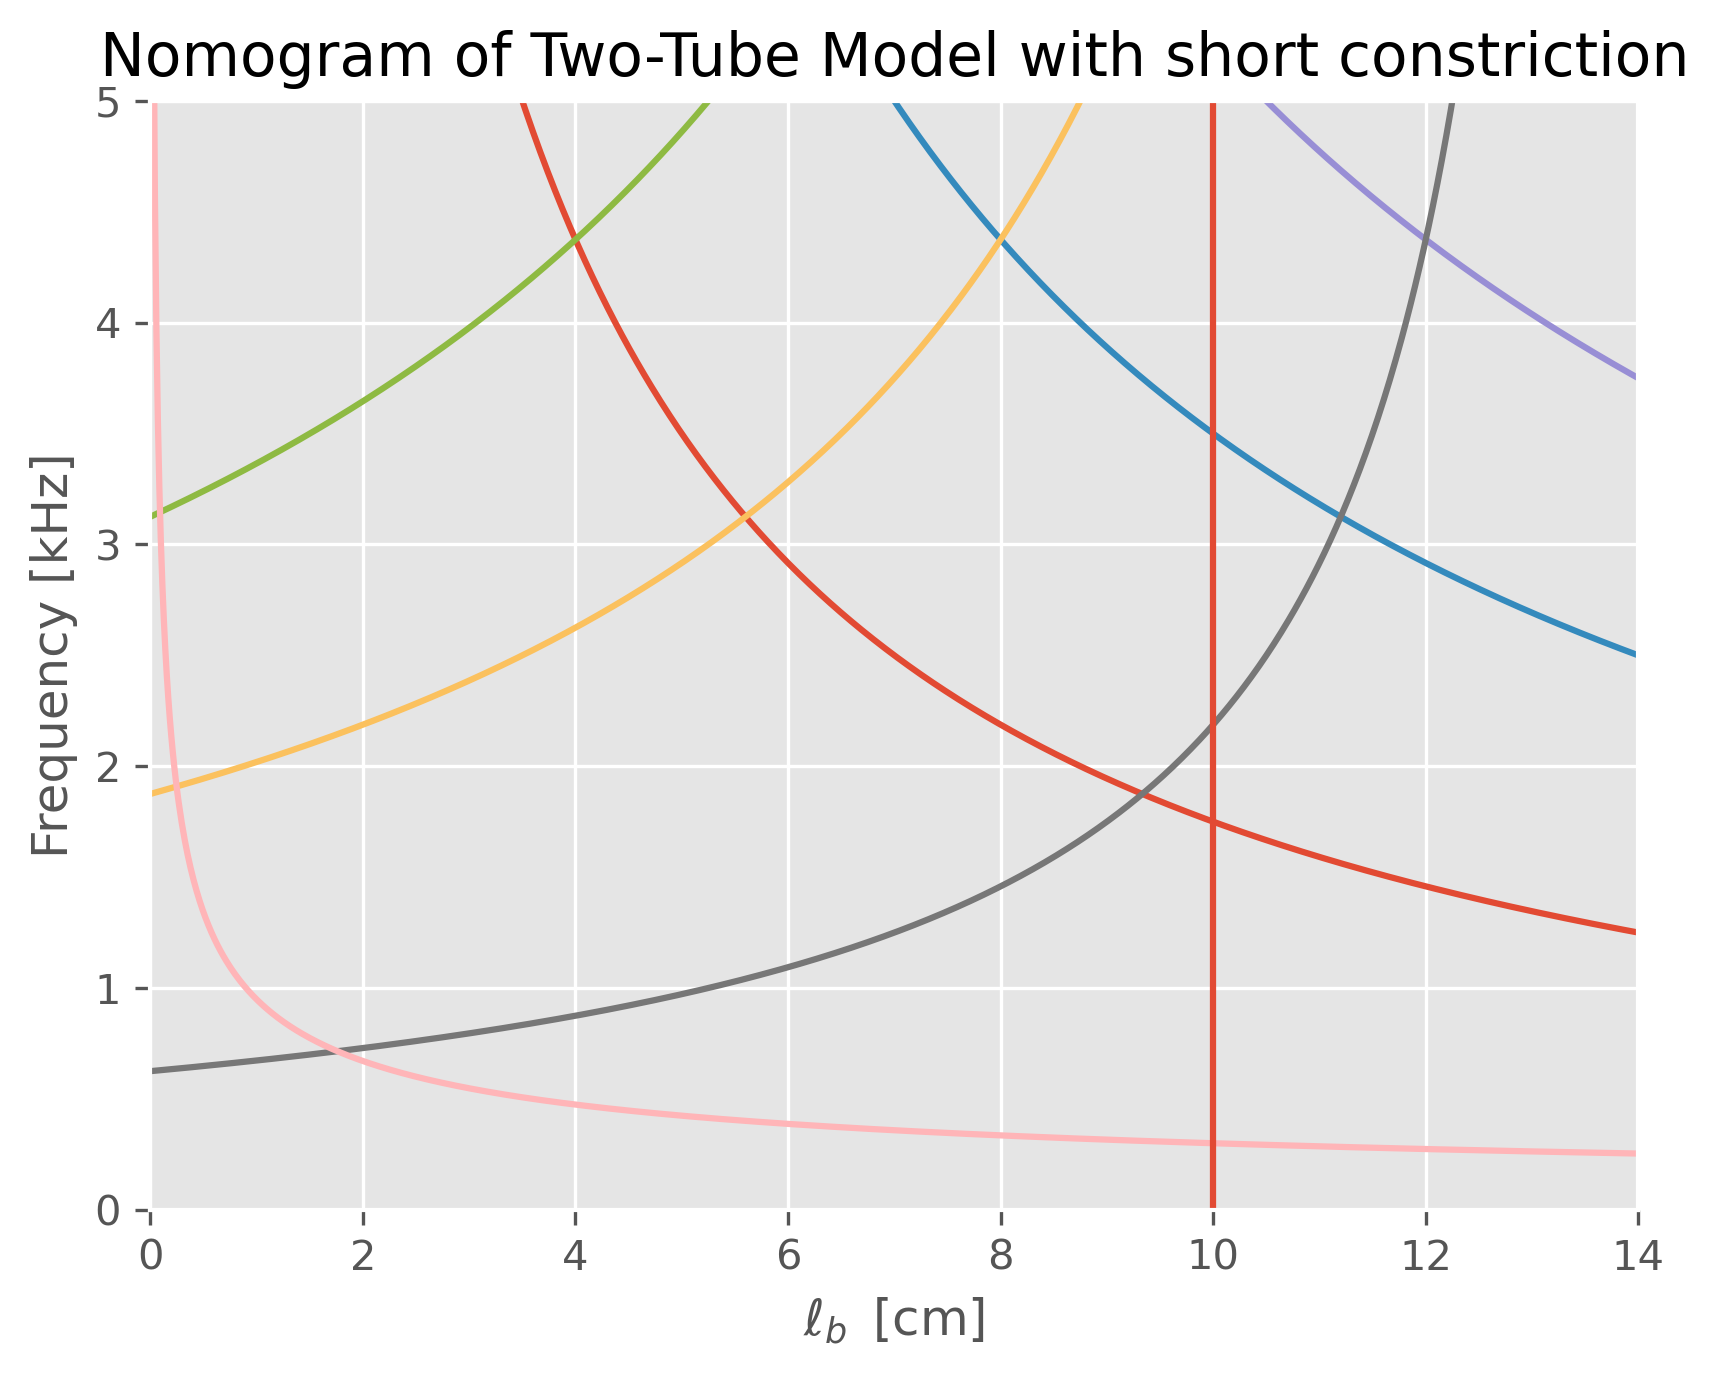

In [5]:
fig = plt.figure(dpi=300);
ax  = plt.subplot();
#ax.set_aspect(1);

def Fb (n,lb,c=35e3):
  return n*c/(2*lb)

def Ff (n,lb,lc=2,L=16,c=35e3):
  return (2*n-1)*c/(4*(L-lc-lb))

def Fh (lb,lc=2,c=35e3):
  return (c/2/np.pi)*np.sqrt(0.58e-1/lb/lc)

e=1e-3
x=np.linspace(e,14-e,1001)
fb1=Fb(1,x)
fb2=Fb(2,x)
fb3=Fb(3,x)
ff1=Ff(1,x)
ff2=Ff(2,x)
ff3=Ff(3,x)
fh =Fh(  x)

ax.plot(x,fb1);
ax.plot(x,fb2);
ax.plot(x,fb3);
ax.plot(x,ff1);
ax.plot(x,ff2);
ax.plot(x,ff3);
ax.plot(x, fh);

ax.axvline(10);

ax.set_yticks(ticks =[0,1e3,2e3,3e3,4e3,5e3],
              labels=[0,1,2,3,4,5]);
ax.set_xlim(0,14);
ax.set_ylim(0,5e3);
ax.set_xlabel('$\ell_b\,\,\,\mathrm{[cm]}$');
ax.set_ylabel('Frequency [kHz]');
ax.set_title('Nomogram of Two-Tube Model with short constriction');

In [6]:
L=10
print(Fh(L))
print(Fb(1,L))
print(Ff(1,L))

299.97645944698934
1750.0
2187.5


### Perturbation Theory

air pressure vs velocity

### Acoustic Vowel Space

    [i]
        low  F1   high/close
        high F2   front
    
    [a]
        high F1   low/open
        low  F2   back
    
    [u]
        low  F1   high/close
        low  F2   back

    F3
        rhotic
        acoustic cue for the front rounded vowels

---

## Fricatives

---

## Stops and Affricates

---

## Nasals and Laterals

---

## Resources

http://newt.phys.unsw.edu.au/jw/speechmodel.html

http://newt.phys.unsw.edu.au/jw/formant.html

---

## Terms

* [[W](https://en.wikipedia.org/wiki/Creaky_voice)] Creaky Voice
* [[W](https://en.wikipedia.org/wiki/Breathy_voice)] Breathy Voice
* [[W](https://en.wikipedia.org/wiki/Fortis_and_lenis)] Fortis (Tense)
* [[W](https://en.wikipedia.org/wiki/Fortis_and_lenis)] Lenis (Lax)
* [[W](https://en.wikipedia.org/wiki/Modal_voice)] Modal Voice
* [[W](https://en.wikipedia.org/wiki/Phonation)] Phonation
* [[W](https://en.wikipedia.org/wiki/Pre-voicing)] Pre Voicing
* [[W](https://en.wikipedia.org/wiki/Slack_voice)] Slack Voice

---

## Bibliography

Johnson, Keith. (2012). _Acoustic and Auditory Phonetics_. 3rd Ed. [Wiley-Blackwell](https://www.wiley.com/en-us/Acoustic+and+Auditory+Phonetics%2C+3rd+Edition-p-9781444343083).

---